In [166]:
import cv2.cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [167]:
def show(image):
  plt.figure(figsize=(20,10))
  plt.imshow(image, cmap='gray')

In [168]:
original_image = cv.imread('/content/drive/MyDrive/University/Computer Vision/references/lab6.png')

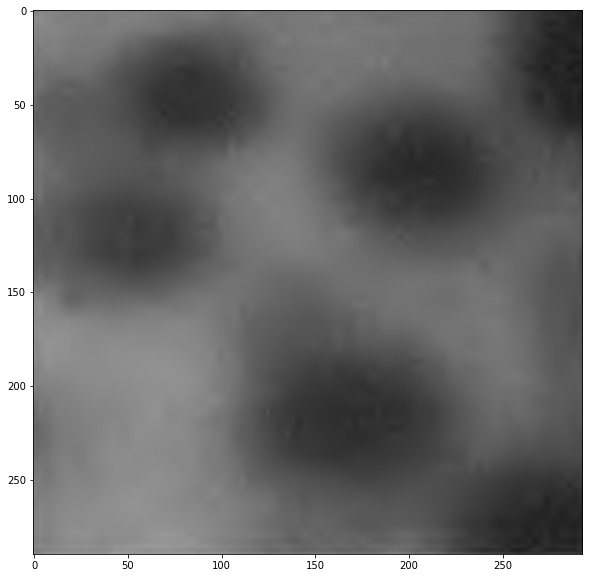

In [169]:
show(original_image)

In [170]:
# Преобразование изображение к полутоновому изображению
gray = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)

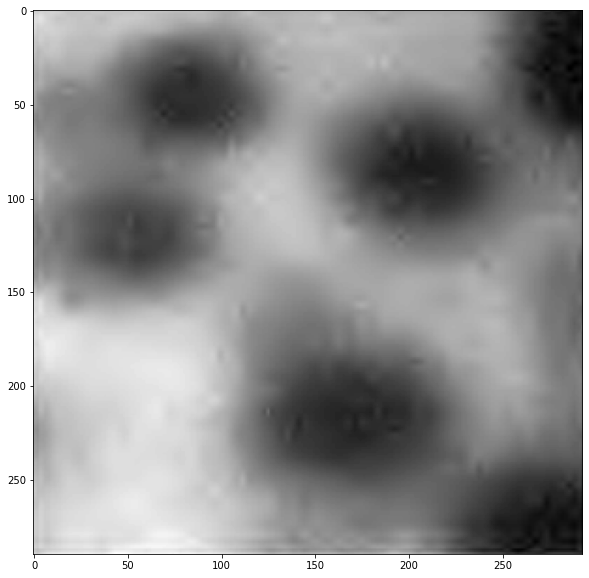

In [171]:
show(gray)

In [172]:
# Преобразование изображение к обратно-бинарному
_, binary_image = cv.threshold(gray, 70, 255, cv.THRESH_BINARY_INV)

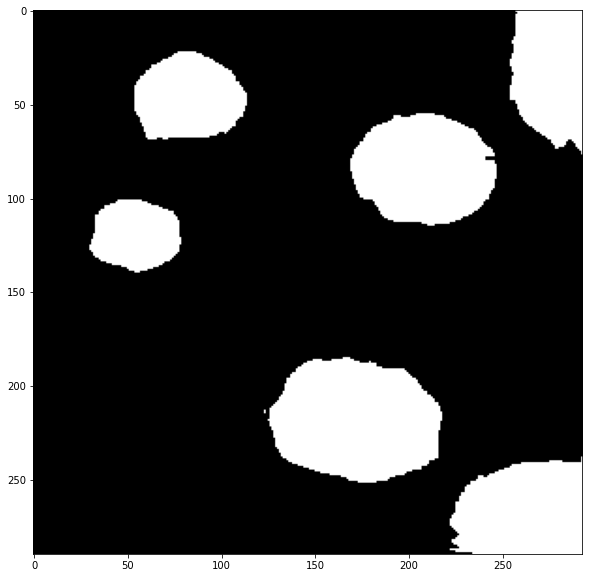

In [173]:
show(binary_image)

In [174]:
# Градиент - это разница между дилатацией и эрозией изображения
kernel = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]],
         dtype=np.uint8)
erode = cv.erode(binary_image, kernel, iterations=18)
dilate = cv.dilate(binary_image, kernel, iterations=10)
_, dilate_inv = cv.threshold(dilate, 1, 128, cv.THRESH_BINARY_INV)
gradient = cv.add(erode, dilate_inv)

In [175]:
# show(dilate)

In [176]:
# show(dilate_inv)

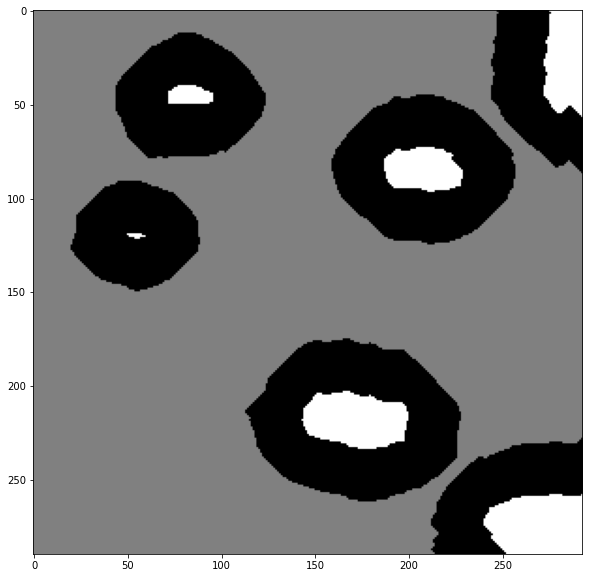

In [177]:
show(gradient)

In [178]:
gradient_watershed = gradient.copy()
original_watershed = original_image.copy()

In [179]:
# Находим линии водораздела
gradient32 = np.int32(gradient)
watershed_lines = cv.watershed(original_image, gradient32)

In [180]:
# Накладываем линин водораздела на градиентное и исходное изображение
gradient_watershed[watershed_lines == -1] = [255]
original_watershed[watershed_lines == -1] = [255, 255, 255]

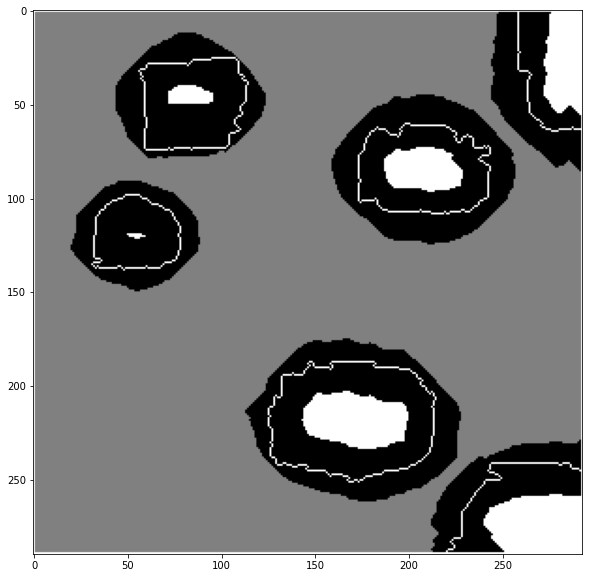

In [181]:
show(gradient_watershed)

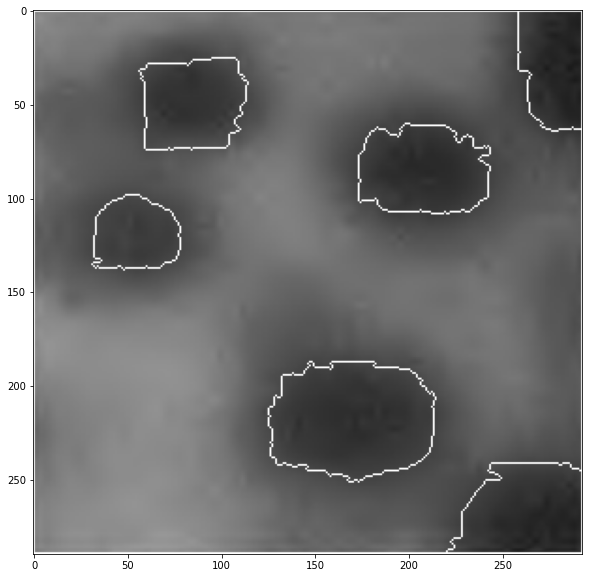

In [182]:
show(original_watershed)